In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
%matplotlib inline

In [14]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

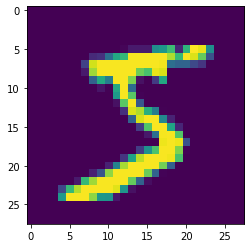

In [18]:
plt.imshow(x_train[0])

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
y_cat_test = to_categorical(y_test, 10)

In [26]:
y_cat_train = to_categorical(y_train, 10)

In [27]:
x_train = x_train/255
x_test = x_test/255

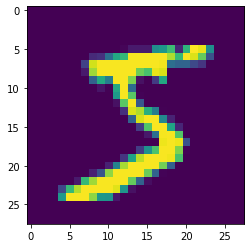

In [28]:
plt.imshow(x_train[0])

In [30]:
x_train.shape

(60000, 28, 28)

In [32]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
x_test.shape

(10000, 28, 28)

In [35]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [36]:
x_test.shape

(10000, 28, 28, 1)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) #Output Layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 30)        510       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4320)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               553088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 554,888
Trainable params: 554,888
Non-trainable params: 0
_________________________________________________________________


In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
earlyStop = EarlyStopping(monitor='val_loss', patience=2)

In [42]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test),
         callbacks=[earlyStop])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6437 - accuracy: 0.8118 - val_loss: 0.2964 - val_accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2721 - accuracy: 0.9201 - val_loss: 0.2162 - val_accuracy: 0.9349
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2015 - accuracy: 0.9403 - val_loss: 0.1639 - val_accuracy: 0.9514
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1589 - accuracy: 0.9531 - val_loss: 0.1323 - val_accuracy: 0.9600
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1308 - accuracy: 0.9613 - val_loss: 0.1091 - val_accuracy: 0.9682
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.0995 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0974 - accuracy: 0.9715 - val_loss: 0.0927 -

In [ ]:
#predict_classes